In [1]:
import keras
from keras.datasets import cifar10

# loading pre-shuffled data to train and test datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


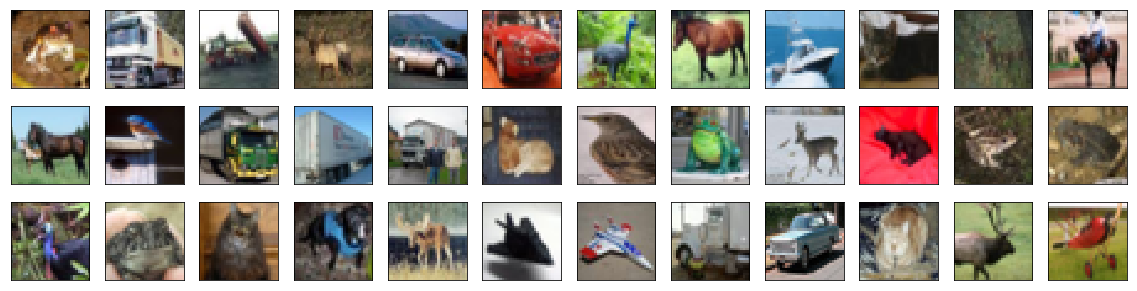

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (20,5))
for i in range(36):
    ax = fig.add_subplot(3,12,i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [3]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [4]:
from keras.utils import np_utils

# one hot encode labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training dataset into training and validation datasets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of x_train
print('x_train shape : ', x_train.shape)

# print number of training, validation and testing images
print(x_train.shape[0], 'train images')
print(x_valid.shape[0], 'valid images')
print(x_test.shape[0], 'test images')


x_train shape :  (45000, 32, 32, 3)
45000 train images
5000 valid images
10000 test images


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# defining the model
model = Sequential()
model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation= 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 3,590,642
Trainable params: 3,590,642
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [7]:
from keras.callbacks import ModelCheckpoint

# training the model
checkpointer = ModelCheckpoint(filepath='MLP.weights.best.hdf5', verbose=1,
                              save_best_only=True)
hist = model.fit(x_train, y_train, batch_size = 32, epochs=20,
                validation_data=(x_valid, y_valid), callbacks=[checkpointer],
                verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 17s - loss: 2.2969 - acc: 0.2650 - val_loss: 1.7968 - val_acc: 0.3546

Epoch 00001: val_loss improved from inf to 1.79677, saving model to MLP.weights.best.hdf5
Epoch 2/20
 - 13s - loss: 1.8563 - acc: 0.3288 - val_loss: 1.7498 - val_acc: 0.3714

Epoch 00002: val_loss improved from 1.79677 to 1.74977, saving model to MLP.weights.best.hdf5
Epoch 3/20
 - 12s - loss: 1.8147 - acc: 0.3461 - val_loss: 1.9559 - val_acc: 0.3062

Epoch 00003: val_loss did not improve from 1.74977
Epoch 4/20
 - 12s - loss: 1.8026 - acc: 0.3537 - val_loss: 1.7689 - val_acc: 0.3766

Epoch 00004: val_loss did not improve from 1.74977
Epoch 5/20
 - 12s - loss: 1.7911 - acc: 0.3551 - val_loss: 1.7034 - val_acc: 0.3918

Epoch 00005: val_loss improved from 1.74977 to 1.70337, saving model to MLP.weights.best.hdf5
Epoch 6/20
 - 13s - loss: 1.7827 - acc: 0.3654 - val_loss: 1.7319 - val_acc: 0.3880

Epoch 00006: val_loss did not improve from 1.70337
Epoch 7/20

In [8]:
model.load_weights('MLP.weights.best.hdf5')

In [10]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('\n', 'Test accuracy', score[0])


 Test accuracy 1.6860657779693604
